# Week 4 - Part 2 - High Frequency Words

### Austin Chan, Justin Herman, Deepak Mongia, Michael O'Donnell, Chester Poon

## Introduction

For this assignment, we decided to analyze the word counts of John Steinbeck's "East of Eden". A timeless classic of American literature, East of Eden is a story of a man, aimless, but hopeful as he struggles with sin and misfortune throughout his life in a post-Civil War America. The main character, Adam, meets a host of characters that challenge his perception of the concept of good and evil as the story progresses. This book is particularly interesting because it raises many questions about the nature of man and the capacity of human forgiveness that are still discussed today.

Textually speaking, East of Eden boasts a rich vocabulary of words and phrases that are ripe for text analysis. The book is over 500 pages long and has been archived in plain text on archive.org (the link to the raw text can be seen below).

https://archive.org/stream/in.ernet.dli.2015.112246/2015.112246.East-Of-Eden-Steinbeck_djvu.txt

In this assignment, we will analyze the word counts in East of Eden and see if they follow Zipf's law.

## Load necessary packages

The code below loads the necessary packages to perform our analysis. The `requests` package is used to fetch text directly from the web. The `pandas` package imports dataframe functionality, similar to R's dataframes. `matplotlib` is used to display plots and figures. `nltk` is used to perform natural language processing tasks like tokenizing, stemming, and transforming words. `scipy` and `numpy` are used to calculate the Zipf's law function so the word counts can be compared to Zipf's law. Matplotlib inline is used to display the plots in the ipython notebook without having to type `plt.show()` every time.

In [51]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import ggplot
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from scipy import special
import numpy as np

%matplotlib inline

## Fetching the text

The code below fetches the text from github. We loaded the text onto github to make it easier to access for other people who also want to analyze this particular text. The first line specifies the url of the text. The second line uses the `get` function in the `requests` package to fetch the text from github. The text is then stored as one long string into the variable called `corpus`.

In [9]:
url = "https://raw.githubusercontent.com/austinchan1/Data-620---Web-Analytics/master/Homework%20Week%204%20-%20Part%202/East_of_Eden.txt"

page = requests.get(url)
corpus = page.text

## Processing the text

After fetching the text, we processed the text by tokenizing it, converting all words to lowercase, and stemming the words. For our analysis, a unique word is a lowercase word stem. Defining a unique word in this way is necessary to prevent minor variants of words from being counted as different words. For example, the word "eaten" and "Eat" without lowercase word stemming would be classified as different words, even though they are the same word in a different tense. Lowercasing both words will transform "Eat" into "eat" and stemming the words will transform "eaten" into "eat". Functionally, both words will be changed to "eat" and thus, will be counted as the same word.

The first line of code tokenizes the corpus, or splits the long string into individual words. The second line of code performs a list comprehension that removes characters that are not alphabet characters and lowercases them. The third line of code stems the words using the Porter Stemmer algorithm. Information about the stemmer can be found here: https://tartarus.org/martin/PorterStemmer/

In [10]:
tokens = word_tokenize(corpus)
words = [word.lower() for word in tokens if word.isalpha()]
stems = [PorterStemmer().stem(word) for word in words]

## Counting the words

The function below counts the words after they have been processed and puts the counts into a dictionary. The function works as follows: the first line initializes a dictionary to store the counts in. The second line starts a for loop that increments a count every time a word is found. If a new word is found, then it will be added to the dictionary. After the loop has been completed, the dictionary of counts is returned.

The last line runs the function on the list of stemmed words.

In [11]:
def word_counter(string):
    
    counts = dict()
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
            
    return(counts)


word_counts = word_counter(stems)

## Analysis

Now that the words have been counted, the analysis can be conducted. The assignment requested the following metrics and graphs to be made:

- The number of total unique words in the corpus.
- The number of unique words that make up half the number of total words.
- The 200 highest frequency words in the in the corpus with a graph of these words.
- A comparison of word frequencies to Zipf's law.

### Unique word count

Calculating the unique word count is pretty straightforward after creating the word count dictionary. The code below transforms the dictionary into a pandas dataframe and sorts the words in descending order by word count. The `reset_index` function just removes the row names and replaces them with an index that goes from zero to the number of rows minus one. The last line shows the dimension of the word count dataframe.

According to the dimensions of the dataframe, there are 12,708 unique words in East of Eden.

In [66]:
WordCountDF = pd.DataFrame.from_dict(word_counts, orient="index")

WordCountDF.columns = ["Word_Counts"]

WordCountDF = WordCountDF.sort_values(by = "Word_Counts", ascending = False)

WordCountDF.reset_index(level = 0, inplace = True)

#12708 unique words in the corpus
WordCountDF.shape

(12708, 2)

### Unique words that are half of total word count

To find the number of unique words that make up half the total word count, the word count dataframe is sorted, a cumulative word count is calculated, and the cumulative percentage is calculated. The code in the previous chunk already sorted the words by word count. The first line in the code below uses the `cumsum()` function in the `pandas` package to calculate the cumulative sum of the word count column. The second line of code takes the cumulative word count and divides it by total word count to get the cumulative percentage of words.

As seen below, 63 words (remember that Python indices start at zero) make up over 50% of the total word count in East of Eden.

In [71]:
WordCountDF["Cumulative_Word_Count"] = WordCountDF.Word_Counts.cumsum()
WordCountDF["Cumulative_Percentage"] = WordCountDF.loc[:,"Cumulative_Word_Count"]/WordCountDF.loc[:,"Word_Counts"].sum()

#63 words make up half the words in the book - 187455/2 = 93727.5
WordCountDF[60:65]

,index,Word_Counts,Cumulative_Word_Count,Cumulative_Percentage
60,go,456,93199,0.497181
61,your,456,93655,0.499613
62,get,453,94108,0.502030
63,then,451,94559,0.504436
64,samuel,440,94999,0.506783


### High frequency words and Zipf's Law

The top 200 highest frequency words can be sliced from the word count dataframe by taking the first 200 ordered elements of the dataframe. The relative frequency is calculated using the same method as in the previous chunk, except the relative frequency is based only on the top 200 words rather than all the words in the corpus. The second chunk of code calculates the Zipf distribution between 1 and 200, which will be used to compare against the distribution of the high frequency words. The last chunk plots the Zipf distritubtion (in red) and the word frequency distribution (in blue).

According to the graph, the word frequencies in East of Eden appear to follow the Zipf distribution somewhat closely. Both curves exhibit a sharp exponential decrease as the number of unique words increases. However, the word frequency distribution tapers at a slower rate compared to the Zipf distribution, which indicates that Zipf's law is not exact, but rather, is an approximation. 

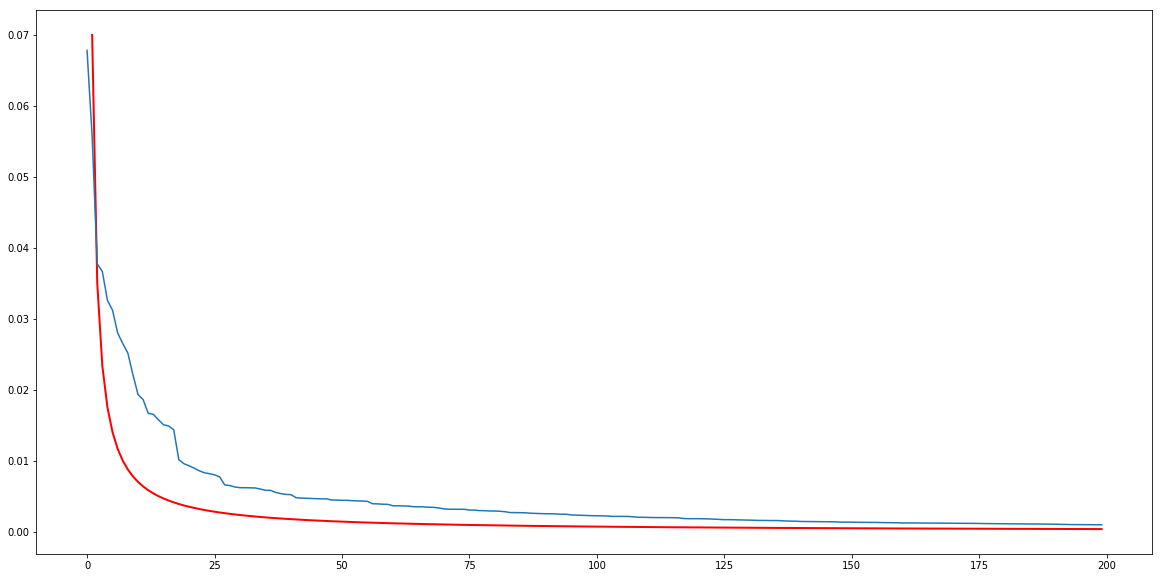

In [72]:
Top200_Words = WordCountDF[0:200]

Relative_Frequency = Top200_Words.loc[:,"Word_Counts"]/Top200_Words.loc[:,"Word_Counts"].sum()

a = 1
x = np.arange(1.0, 200.0)
y = (x**(-a) / special.zetac(a))

plt.figure(figsize=(20,10))

plt.plot(x, (y/max(y)) * 0.07, linewidth=2, color='r')
Relative_Frequency.plot(use_index=False)

## Comparison to other corpora

Most corpora are pretty similar in terms of word frequency. The top words are usually common English stopwords like "the", "and", and "a" or pronouns that do not contribute to the meaning of the corpus in a significant way. This book is no different. The top 10 words in this book are all stopwords (seen below). 

In [73]:
Top200_Words[0:10]

,index,Word_Counts,Cumulative_Word_Count,Cumulative_Percentage
0,the,8506,8506,0.045376
1,and,6980,15486,0.082612
2,a,4734,20220,0.107866
3,to,4596,24816,0.132384
4,i,4088,28904,0.154192
5,he,3913,32817,0.175066
6,you,3512,36329,0.193801
7,of,3324,39653,0.211533
8,it,3156,42809,0.228369
9,in,2773,45582,0.243162


Ignoring the stopwords, there are some important differences between this corpus and all corpora. Being a work of narrative fiction published in 1952, many of the common words are characters and verbs (seen below). This would make sense because stories typically involve characters going places and doing things, which is indicative of events happening in the narrative. Not all words in all corpora are narrative fiction, so it is likely that the word frequencies of other corpora differ by genre of writing, though it is difficult to say without a comprehensive corpus from other sources. 

Ultimately, it is difficult to judge the contentes of text using word count alone. Most corpora are very similar in word frequency and stopword usage, which makes them difficult to distinguish from each other without digging deeper. In terms of classification, it would be useful to use more informative metrics like term frequency-inverse document frequency (tf-idf) to extract meaning from texts.

In [78]:
stop_words = set(stopwords.words("english"))

filtered_words = WordCountDF[~WordCountDF["index"].isin(stop_words)]

filtered_words[0:20]

,index,Word_Counts,Cumulative_Word_Count,Cumulative_Percentage
14,said,1976,56478,0.301288
23,adam,1040,68907,0.367592
42,know,592,83500,0.445440
44,like,585,84674,0.451703
47,would,579,86413,0.460980
49,could,557,87528,0.466928
51,lee,553,88634,0.472828
56,want,492,91288,0.486986
57,one,490,91778,0.489600
60,go,456,93199,0.497181
